## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create DataFrame with only the Drug Regimen and Tumor Volume (mm3) columns with the Combined DataFrame
regimen_tumor_volume_df = combined_df[["Drug Regimen","Tumor Volume (mm3)"]]

# Group by the Drug Regimen
regimen_tumor_volume_grp=regimen_tumor_volume_df.groupby("Drug Regimen")

# Use functions for the group (mean, median, variance, and standard deviation) to get the values by Drug Regimen
# Merge the results of the grouping into one DataFrame for Stats, rename columns to show the correct header for each column
regimen_tumor_volume_stats_df = pd.merge(regimen_tumor_volume_grp.mean(),regimen_tumor_volume_grp.median(),on="Drug Regimen")
regimen_tumor_volume_stats_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3) - Mean",
                                     "Tumor Volume (mm3)_y":"Tumor Volume (mm3) - Median"},
                                     inplace=True)
regimen_tumor_volume_stats_df = pd.merge(regimen_tumor_volume_stats_df,regimen_tumor_volume_grp.var(),on="Drug Regimen")
regimen_tumor_volume_stats_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) - Variance"},inplace=True)
regimen_tumor_volume_stats_df = pd.merge(regimen_tumor_volume_stats_df,regimen_tumor_volume_grp.std(),on="Drug Regimen")
regimen_tumor_volume_stats_df.rename(columns={"Tumor Volume (mm3)":"Tumor Volume (mm3) - Std Deviation"},inplace=True)

# Create an empty DataFrame for storing the SEM values
SEM_df = pd.DataFrame(columns=["Drug Regimen","Tumor Volume (mm3) - SEM"])

# Loop through the unique Drug Regimen values
for regimen in regimen_tumor_volume_df["Drug Regimen"].unique():
    # Load a DataFrame with the data for the Drug Regimen
    temp_df=regimen_tumor_volume_df.loc[regimen_tumor_volume_df["Drug Regimen"] == regimen]
    
    # Create a single row Dataframe with the Regimen and SEM
    df= pd.DataFrame([[regimen, st.sem(temp_df["Tumor Volume (mm3)"])]],columns=["Drug Regimen","Tumor Volume (mm3) - SEM"])
    # Concatenate the single row DataFrame into the SEM DataFrame
    SEM_df = pd.concat([SEM_df,df])

# Merge the SEM DataFrame into the Stats DataFrame
regimen_tumor_volume_stats_df = pd.merge(regimen_tumor_volume_stats_df,SEM_df,on="Drug Regimen")

# Set the index to Drug Regimen
regimen_tumor_volume_stats_df = regimen_tumor_volume_stats_df.set_index("Drug Regimen")

# Display the Summary Data
regimen_tumor_volume_stats_df


,Tumor Volume (mm3) - Mean,Tumor Volume (mm3) - Median,Tumor Volume (mm3) - Variance,Tumor Volume (mm3) - Std Deviation,Tumor Volume (mm3) - SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

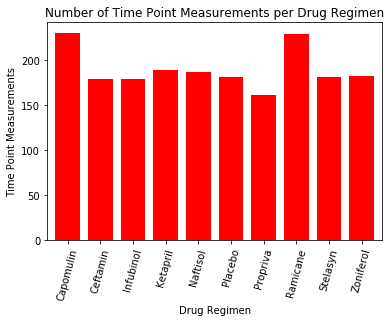

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Create a DataFrame with all Drug Regimen and Timepoint measurment data
timepoint_drug_df = combined_df[["Drug Regimen","Timepoint"]]

# Get the labels for the x-axis and sort them
drug_regimen = timepoint_drug_df["Drug Regimen"].unique()
drug_regimen.sort()

# Group the data by Drug Regimen
drug_grp = timepoint_drug_df.groupby("Drug Regimen")

# Get a count of total time poit measurements for each Drug Regimen
drug_count_df = drug_grp.count()

# Sort by Drug Regimen
drug_count_df = drug_count_df.sort_values("Drug Regimen")

# Get the series of total time point measurements for the bar chart
timepoint_count = drug_count_df["Timepoint"]

# Use Pandas to create Bar Chart
chart = drug_count_df.plot(kind="bar",color="red",legend=False,title="Number of Time Point Measurements per Drug Regimen",rot=75, width=.75)
chart.set_ylabel("Time Point Measurements")
chart.set_xlim=(-.89, 12)

# Display the Bar Chart
plt.show()

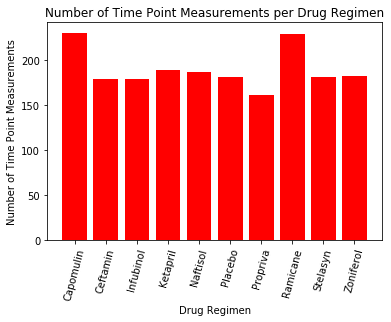

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Use matplotlib to create Bar Chart
plt.bar(drug_regimen,timepoint_count,color="red")

# Set Labels, Title
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)
plt.ylabel("Number of Time Point Measurements")
plt.title("Number of Time Point Measurements per Drug Regimen")

plt.xlim(-.89,9.89)
#display the Bar Chart
plt.show()


## Pie plots

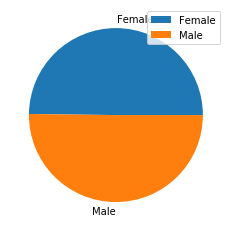

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create a group of Mouse Data by Sex
mouse_type_grp = mouse_metadata.groupby("Sex")

# Create a DataFrame with Mouse Sex by Count
mouse_type_count_df = mouse_type_grp.count()

# Drop unecessary columns
mouse_type_count_df = mouse_type_count_df.drop({"Drug Regimen","Age_months","Weight (g)"},axis=1)

# Rename column to describe the Mice Counts
mouse_type_count_df.rename(columns={"Mouse ID":"NumberOfMice"},inplace=True)

# Create a Pie Plot of data
m_f_distribution = mouse_type_count_df.plot(kind="pie",y="NumberOfMice")
m_f_distribution.set_ylabel("")

# Display the Pie Plot
plt.show()

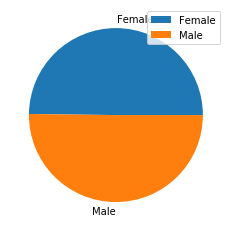

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Reset the index on the DataFrame to allow a series to be created
mouse_type_count_df=mouse_type_count_df.reset_index()

# Get the Sex labels for the Pie Plot
labels = mouse_type_count_df["Sex"].unique()

# Create a Pie Plot of the data
plt.pie(mouse_type_count_df["NumberOfMice"],labels=labels)
plt.legend()

# Display the Pie Plot
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Create a list of the Drug Regimens for Looping
regimen_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create an empty dictionary to hold the Drug Regimen and data for the Drug Regimen
drug_dict = {}

# Loop through each Drug Regimen
for regimen in regimen_list:

    # Create a DataFrame for Drug Regimen
    drug_regimen_timepoint_df =combined_df.loc[combined_df["Drug Regimen"]==regimen,["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
    
    # Group by Mouse ID 
    drug_regimen_timepoint_grp = drug_regimen_timepoint_df.groupby("Mouse ID")
    # Get the Maximum Timepoint for each Mouse ID
    drug_regimen_timepoint_max_df = drug_regimen_timepoint_grp.max()
    # Drop unnecessary column
    drug_regimen_timepoint_max_df.drop(columns={"Tumor Volume (mm3)"},inplace=True)

    # Merge the Max Timepoint DataFrame with the Drug Regimen DataFrame on Mouse ID and Timepoint to get the Tumor Volume for the last timepoint
    drug_regimen_timepoint_max_df = pd.merge(drug_regimen_timepoint_max_df,drug_regimen_timepoint_df, on=["Mouse ID","Timepoint"])

    # Get the data for the calculations and plot
    drug_regimen_final_tumor_df = drug_regimen_timepoint_max_df["Tumor Volume (mm3)"]
    quartiles = drug_regimen_final_tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"lower quartile: {lowerq}")
    print(f"upper quartile: {upperq}")
    print(f"interquartile: {iqr}")
    print(f"median: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Add Drug Regimen and data to the dictionary
    drug_dict.update({regimen:drug_regimen_final_tumor_df})
    
    drug_regimen_outlier_df = drug_regimen_timepoint_max_df.loc[(drug_regimen_timepoint_max_df["Tumor Volume (mm3)"] < lower_bound) | (drug_regimen_timepoint_max_df["Tumor Volume (mm3)"] > upper_bound)]
    if len(drug_regimen_outlier_df) > 0:
        for outlier_rec in range(len(drug_regimen_outlier_df)):
            outlier_mouse_df=drug_regimen_outlier_df.iloc[outlier_rec]
            print(f"Mouse ID: {outlier_mouse_df['Mouse ID']} - Tumor Volume (mm3): {outlier_mouse_df['Tumor Volume (mm3)']} ")

lower quartile: 32.37735684
upper quartile: 40.1592203
interquartile: 7.781863460000004
median: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
lower quartile: 31.56046955
upper quartile: 40.65900627
interquartile: 9.098536719999998
median: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
lower quartile: 54.04860769
upper quartile: 65.52574285
interquartile: 11.477135160000003
median: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Mouse ID: c326 - Tumor Volume (mm3): 36.321345799999996 
lower quartile: 48.72207785
upper quartile: 64.29983003
interquartile: 15.577752179999997
median: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


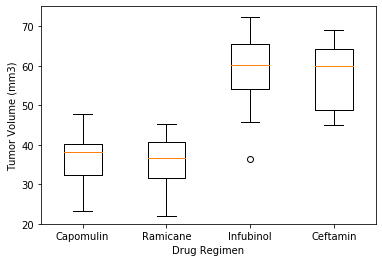

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Configure plot characteristics
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylim(20,75)

# Create the plot using the dictionary
ax1.boxplot(drug_dict.values())
ax1.set_xticklabels(drug_dict.keys())

# Display the Box Charts
plt.show()


## Line and scatter plots

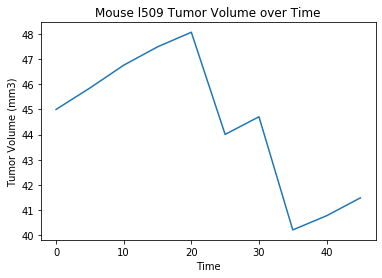

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a DataFrame for Mouse ID l509
single_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "l509"]

# Create line plot of Tumor Voulume over Time for the Mouse l509
plt.plot(single_mouse_df["Timepoint"],single_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse l509 Tumor Volume over Time")

# Display the plot
plt.show()


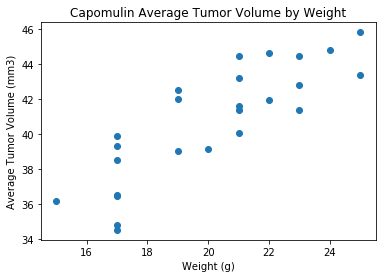

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a DataFrame for Capomulin data
capomulin_df = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin",["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]

# Group by Mouse ID
capomulin_grp = capomulin_df.groupby("Mouse ID")
# Create a DataFrame with average Weight and Tumor Volume (Average Weight is not needed but it since weight is only recored once per mouse the average will be that value)
capomulin_mouse_df = capomulin_grp.mean()

# Create a scatter plot
plt.scatter(capomulin_mouse_df["Weight (g)"],capomulin_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume by Weight")

# Display the scatter plot
plt.show()


The correlation between both factors is 0.84
y = 0.95x + 21.55


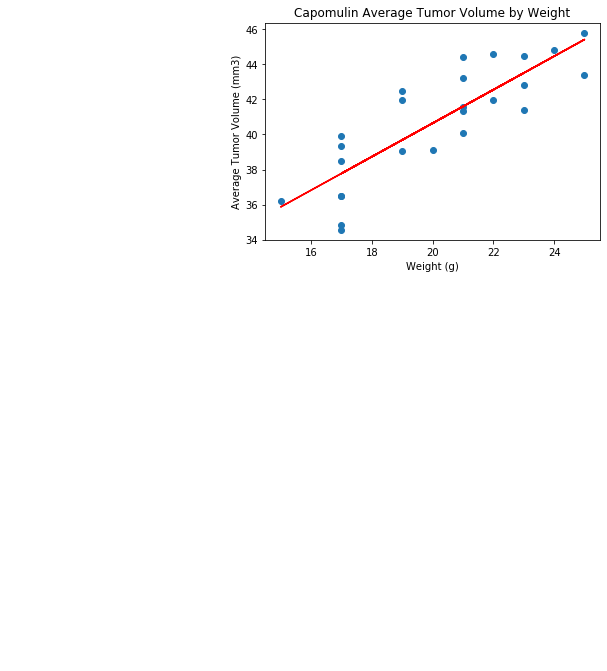

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Create weigth and tumor volume DataFrames
weight = capomulin_mouse_df.loc[:,"Weight (g)"]
tumor_volume = capomulin_mouse_df.loc[:,"Tumor Volume (mm3)"]
# Calculate the Pearson r value between weight and tumor volume
correlation = st.pearsonr(weight,tumor_volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Get the linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_volume)
regress_values = weight * slope + intercept
# Get the regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Create the same scatter plot 
plt.scatter(capomulin_mouse_df["Weight (g)"],capomulin_mouse_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Average Tumor Volume by Weight")

# Create the regression line on the scatter plot
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Display the scatter plot
plt.show()